# Online Shoppers Purchasing Intention

## Stat 301-101 Group 36 
#### **Group Members:** ####
- Russell Gibriel
- Dengjun He
- Daksh Mathur
- Aaron Wu
#### **Date:** 2025.11.25 ####
---

## Introduction

Start with relevant background information on the topic to prepare those unfamiliar for the rest of your proposal. Motivate the question you are about to add.

Formulate one broad question for investigation that would require you to incorporate fitting several models in your analysis, using the same response variable and 2 or more covariates. Indicate if the primary goal is inference or prediction. Make sure that the question(s) can be answered with the data available. For example, you won't be able to quantify the "effect of X on Y" or "the influence of X on Y" or "how X affects Y" using the methods learned in class and observational data.

If available, align your question/objectives with the existing literature on the topic. You can add a reference to a scientific publication if available and listed in the References section (not mandatory). 

----

## Methods and Results

### a) Data

The dataset used for this analysis contains information on online shopping behaviour. Each row in the dataset corresponds to a single session for a unique user recorded over a 1 year period. The columns correspond to specific features of each browsing session.

| Variable Name           | Type        | Description |
|--------------------------|-------------|--------------|
| Administrative           | Integer     | Number of Administrative pages visited |
| Administrative_Duration  | Integer     | Total time spent in Administrative pages (seconds) |
| Informational            | Integer     | Number of Informational pages visited |
| Informational_Duration   | Integer     | Total time spent in Informational pages (seconds) |
| ProductRelated           | Integer     | Number of Product Related pages visited |
| ProductRelated_Duration  | Continuous  | Total time spent in Prodct Related pages (seconds) |
| BounceRates              | Continuous  | Percentage of visitors who enter the site and leave without triggering any requests |
| ExitRates                | Continuous  | For all pageviews to the page, the percentage that were the last in the session |
| PageValues               | Integer     | Average value for a web page that a user visited before completing an e-commerce transaction |
| SpecialDay               | Integer     | Closeness of site visit time to a specific special day |
| Month                    | Categorical | The month that the session took place in |
| OperatingSystems         | Categorical | User's computer operating system |
| Browser                  | Categorical | User's browser used for accessing webpages |
| Region                   | Categorical | User region |
| TrafficType              | Categorical | Web traffic type             |
| VisitorType              | Categorical | Returning or new visitor |
| Weekend                  | Binary      | Whether the session is during a weekend |
| Revenue                  | Binary      | Whether the user made a purchase |

- The dataset used in this project is the Online Shoppers Purchasing Intention Dataset, which contains information on user behavior collected from an e-commerce website, available from the UCI Machine Learning Repository:
- **Link:** https://archive.ics.uci.edu/dataset/512/online+shoppers+intention**
- After filtering for Region = 1, the dataset contains 4,780 observations and 18 variables.
- Each row represents a user session, and each column describes a session-level attribute such as browsing activity, engagement, and purchase behavior.


In [2]:
# load necessary libraries for data analysis
library(tidyverse)
library(repr)
library(broom) # needed for tidy
library(car) # needed for vif

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




In [3]:
# the dataset is stored in a personal github repository and loaded from there
url <- "https://raw.githubusercontent.com/Russell-97/STAT-301-Project/refs/heads/main/online_shoppers_intention.csv"
data <- read_csv(url) 

Rows: 12330 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Month, VisitorType
dbl (14): Administrative, Administrative_Duration, Informational, Informatio...
lgl  (2): Weekend, Revenue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Source and Information

`Administrative`, `Administrative Duration`, `Informational`, `Informational Duration`, `Product Related`, `Product Related Duration` : Values are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action

`Bounce Rate`, `Exit Rate`, `Page Value` :  Metrics are measured by "Google Analytics" for each page

There is no information regarding the collection of the rest of the variables

Sakar, C. & Kastro, Y. (2018). Online Shoppers Purchasing Intention Dataset [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5F88Q.

### Pre-selection of variables

Not all variables will be used/needed in the analysis, and so `Region` is dropped

Since we are only working with data from region 1, after filtering the dataset we are not concerned with the region variable. This makes it redundant and so it can be dropped with compromising on the quality of the analysis.



### b) Exploratory Data Analysis

We clean and wrangle the data by keeping only relevant variables, filtering for data from region 1, and changing data types where necessary

In [4]:
data_clean <- data %>%
        filter(Region == 1) %>%
        select(-Region) %>%
        mutate(across(c(OperatingSystems, Browser, TrafficType), as.factor),
            Month = factor(Month, levels = c("Jan", "Feb", "Mar", "Apr", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")),
        VisitorType = as.factor(VisitorType))

head(data_clean)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,TrafficType,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>,<lgl>
0,0,0,0,1,0.0000,0.20000000,0.20000000,0,0.0,Feb,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.0000,0.00000000,0.10000000,0,0.0,Feb,2,2,2,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.5000,0.02000000,0.05000000,0,0.0,Feb,3,3,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.2167,0.01578947,0.02456140,0,0.0,Feb,2,2,3,Returning_Visitor,FALSE,FALSE
1,0,0,0,0,0.0000,0.20000000,0.20000000,0,0.0,Feb,1,2,5,Returning_Visitor,TRUE,FALSE
0,0,0,0,3,738.0000,0.00000000,0.02222222,0,0.4,Feb,2,4,2,Returning_Visitor,FALSE,FALSE


After filtering the data for region 1, we can see that there are 4780 observations in this region. We can now create a visualization to get an understanding of how the data behaves. To do this we can select a few variables that capture the user's online behaviour and also the time of year. Let us create a plot of Revenue, time spent on product related pages, and month

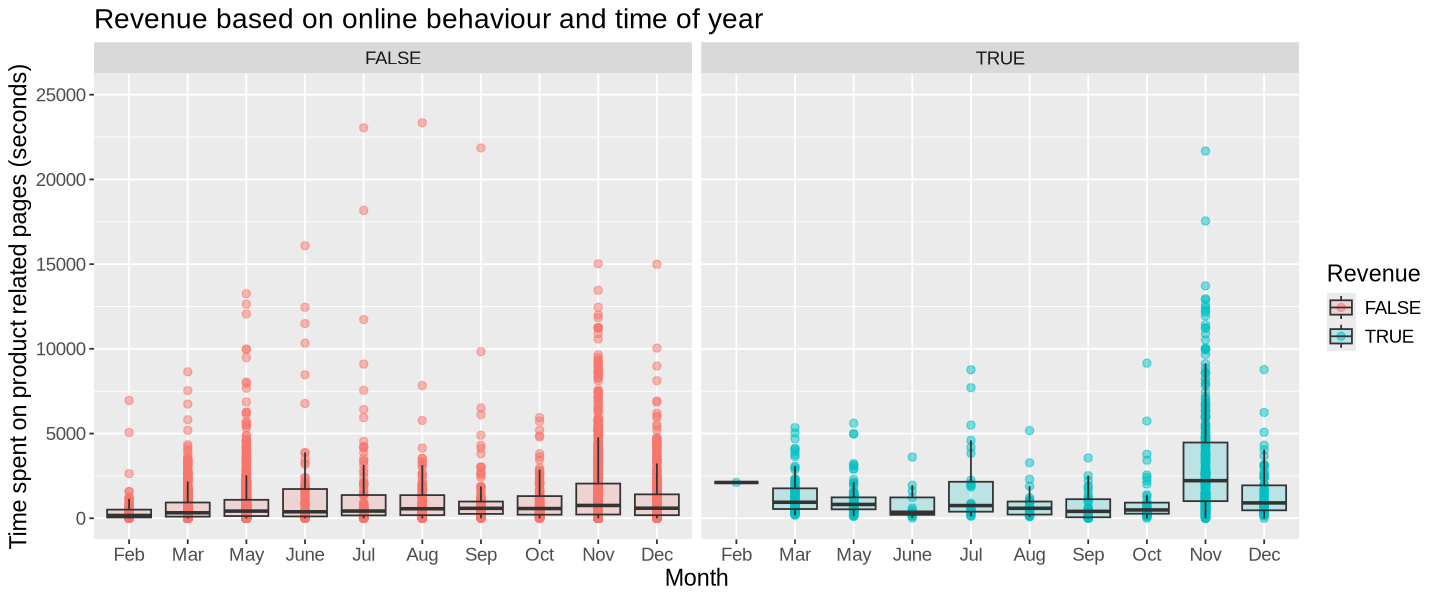

In [5]:
options(repr.plot.width = 12, repr.plot.height = 5) 

shopper_scatterplot <- 
  data_clean %>%
  ggplot() +
  geom_point(aes(y = ProductRelated_Duration, x = Month, color = Revenue), alpha = 0.5, size = 2) +
  coord_cartesian(ylim = c(1, 25000)) + # only 4 sessions have duration >= 25000 and so these outliers are excluded for visualization purposes
  facet_wrap(~ Revenue) +
  labs(y = "Time spent on product related pages (seconds)", x = "Month") +
  ggtitle("Revenue based on online behaviour and time of year") +
  theme(text = element_text(size = 14)) +
  geom_boxplot(aes(x = Month, y = ProductRelated_Duration, fill = Revenue),
  alpha = 0.2, outlier.shape = NA)



shopper_scatterplot

### Interpretation
- The above plot explores the change in the revenue based on two key variables that represent the online shopping behaviour and also time of year. It is relevant because we can immediately observe some meaningful patterns in the data from this plot.
- Each point on the plot represents a single shopping session for a unique user. It can be seen that the duration spent on online shopping and also the frequency varies throughout the year. It can also be seen when separating the data by `Revenue` that sessions that did not end in a purchase show similar trends throughout the year to sessions that did end in a purchase.
- From the visualization we learn that November is the month with the most people shopping online, and in the case of purchases, it is also the month with the longest time spent on product related pages. We also learn that time spent online does not exceed 15000 for the majority of sessions, and that most sessions that end with a purchase are usually shorter, with a majority being under 5000 seconds.

### c) Methods: Plan

- The method that I am planning to use to address my question is logistic regression. This is suitable because the response variable we are investigating is binary.  
- Since logistic regression is a linear model, the assumptions required are that the observations are independent and the relationship between each continuous predictor and the log-odds of the outcome is approximately linear.  
- Potential limitations are that the data may have non-linear relationships or predictors may be highly collinear

### d) Code and Results

Before fitting the model, let us clean up some of the data and remove collinear variables to avoid potential problems. From the visualization in section 3 it can be seen that there are 0 values for the Months of January and April. Next create a temporary model and use vif to examine multicollinearity between similar variables.

In [5]:
data_clean <- droplevels(data_clean) # levels Jan and Apr are removed

In [6]:
lm_temp <- glm(
  Revenue ~ . - OperatingSystems - Browser - TrafficType, 
  data = data_clean
)

vif(lm_temp)

,GVIF,Df,GVIF^(1/(2*Df))
Administrative,1.970739,1,1.403830
Administrative_Duration,1.863959,1,1.365269
Informational,1.804378,1,1.343271
Informational_Duration,1.742939,1,1.320204
ProductRelated,4.881553,1,2.209424
ProductRelated_Duration,4.968401,1,2.228991
BounceRates,6.243047,1,2.498609
ExitRates,6.959159,1,2.638022
PageValues,1.057877,1,1.028532
SpecialDay,1.373432,1,1.171935


It can be seen that some of the similar predictors are collinear, such as `ProductRelated` and `ProductRelated_Duration`and also `BounceRates` and `ExitRates`. This means that we can exclude one from each of the two pairs of variables from the final model.

In [7]:
model <- glm(
  Revenue ~ . - OperatingSystems - Browser - TrafficType - ExitRates - ProductRelated_Duration, 
  data = data_clean,
  family = binomial
)

tidy(model, exponentiate = TRUE) # table to report results, exponentiate makes it easier to interpret results

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.544937e-02,1.091815e+00,-3.81949831,1.337234e-04
Administrative,9.881058e-01,1.713150e-02,-0.69844906,4.848964e-01
Administrative_Duration,1.000011e+00,2.641247e-04,0.04169110,9.667449e-01
Informational,1.070718e+00,4.050113e-02,1.68708837,9.158636e-02
Informational_Duration,9.997974e-01,3.391256e-04,-0.59749471,5.501771e-01
ProductRelated,1.005852e+00,9.046463e-04,6.44986896,1.119469e-10
BounceRates,2.430216e-09,4.034749e+00,-4.91611392,8.827904e-07
PageValues,1.087970e+00,3.781600e-03,22.29565152,4.072012e-110
SpecialDay,1.109949e+00,3.879806e-01,0.26886443,7.880340e-01


-  The intercept corresponds to the odds of purchase for a baseline session (all numeric predictors at 0 and factors at reference levels) and implies a very low baseline purchase probability of roughly 1–2%, which is expected
- Month indicators show strong seasonality, with some months like October and November having much higher odds of purchase than the reference month February
- Higher PageValues and more ProductRelated page views have substantially higher odds of purchase, while higher BounceRates sharply reduce purchase odds; these effects are large, significant, and align well with expectations about engaged vs. low‑quality visits

---

## Discussion

In this section, you’ll interpret and reflect on the results you obtained in the previous section with respect to the main question/goal of your project.

- Summarize what you found and the implications/impact of your findings  
- If relevant, discuss whether your results were what you expected to find  
- Discuss how your model could be improved  
- Discuss future questions/research this study could lead to  